In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn import linear_model
import string
import math
import gzip
import random

## Exploratory Data Analysis

In [63]:
df_rent = pd.read_json('renttherunway_final_data.json.gz', compression='gzip', lines=True)
print(len(df_rent))
df_rent.head()

192544


,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


### Transforming Weight and Ploting Distribution

In [64]:
def weight_clean(row):
    try:
        return int(row.split('l')[0])
    except:
        return np.nan
df_rent['weight'] = df_rent['weight'].apply(weight_clean)   

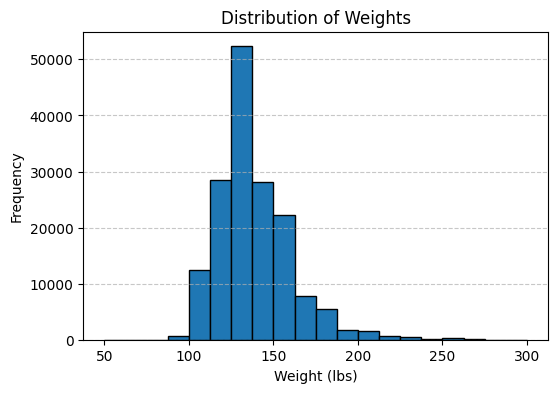

In [65]:
#plotting distribution of weight transformed
plt.figure(figsize=(6, 4))
plt.hist(df_rent['weight'], bins=20, edgecolor='black')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.title('Distribution of Weights')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Parsing Height Values to Inches and Ploting Distribution

In [110]:
def height_to_inches(height):
    if pd.isna(height):
        return np.nan  # Handle NaN values
    import re
    match = re.match(r"(\d+)' (\d+)\"", height)  # Match feet and inches
    if not match:
        return np.nan  # Return NaN for invalid formats
    feet = int(match.group(1))
    inches = int(match.group(2))
    total_inches = feet * 12 + inches
    return total_inches 

# Apply the function to the column
df_rent['height_inches'] = df_rent['height'].apply(height_to_inches)

C:\Users\lanar\AppData\Local\Temp\ipykernel_33284\4133655850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='height_inches', data=df_rent, palette='viridis')


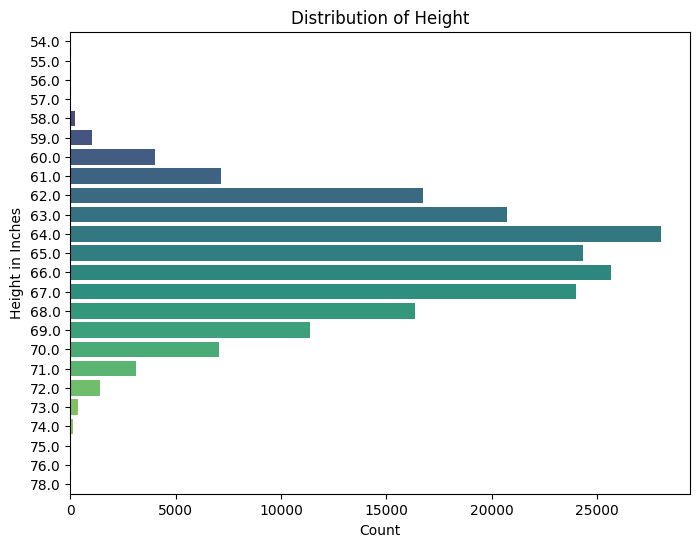

In [67]:
plt.figure(figsize=(8, 6))
sns.countplot(y='height_inches', data=df_rent, palette='viridis')
plt.title('Distribution of Height')
plt.xlabel('Count')
plt.ylabel('Height in Inches')
plt.show()

### Distribution of Item Size

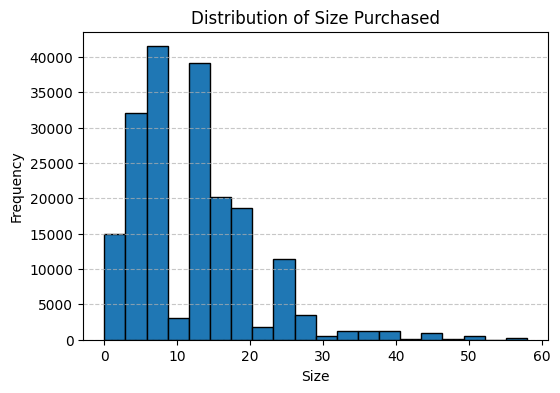

In [68]:
plt.figure(figsize=(6, 4))
plt.hist(df_rent['size'], bins=20, edgecolor='black')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

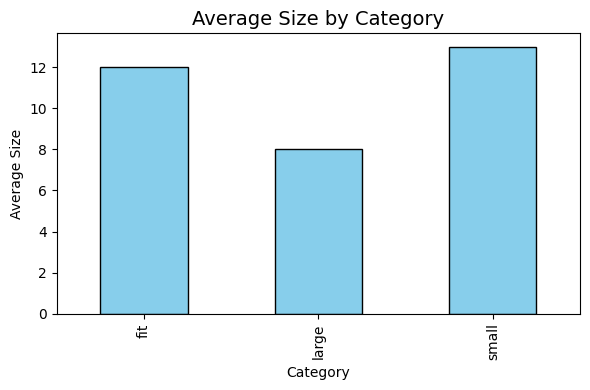

In [118]:
plt.figure(figsize=(6, 4))
average_size = df_rent.groupby('fit')['size'].median()
average_size.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Size by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Average Size')

# Show the plot
plt.tight_layout()
plt.show()

### Distribution of Customer Age

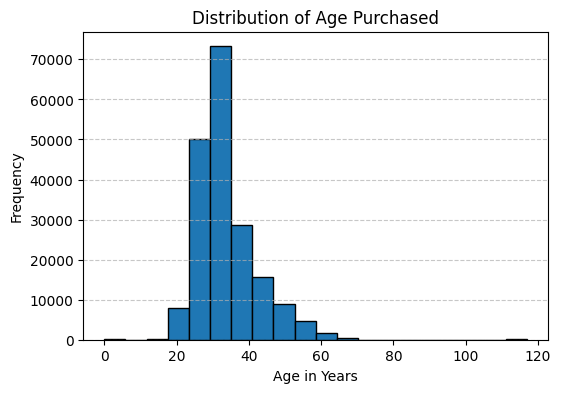

In [69]:
plt.figure(figsize=(6, 4))
plt.hist(df_rent['age'], bins=20, edgecolor='black')
plt.xlabel('Age in Years')
plt.ylabel('Frequency')
plt.title('Distribution of Age Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Distribution of the occasion the item was rented for

C:\Users\lanar\AppData\Local\Temp\ipykernel_33284\602288531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rented for', data=df_rent, palette='viridis')


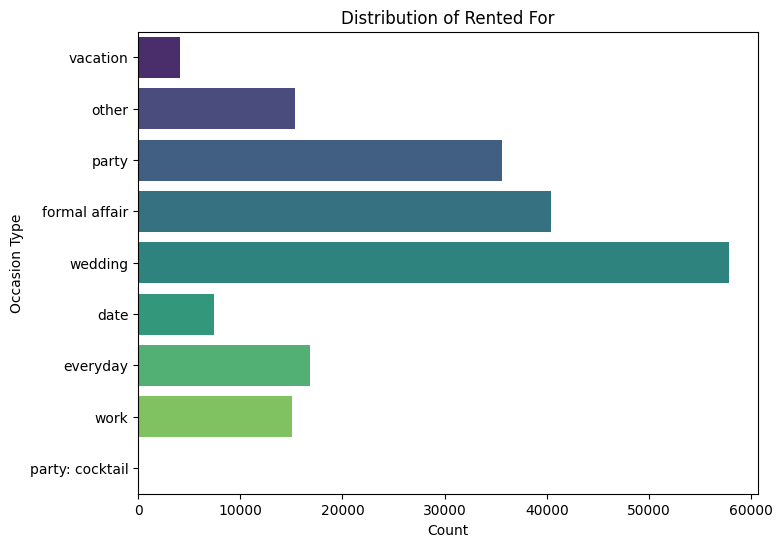

In [70]:
#distribution of occasion the item was rented for
plt.figure(figsize=(8, 6))
sns.countplot(y='rented for', data=df_rent, palette='viridis')
plt.title('Distribution of Rented For')
plt.xlabel('Count')
plt.ylabel('Occasion Type')
plt.show()

### Transforming Rating Scale

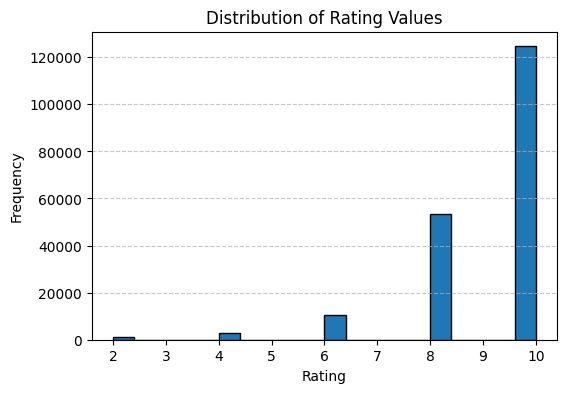

In [104]:
#distribution of rating values
plt.figure(figsize=(6, 4))
plt.hist(df_rent['rating'], bins =20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [84]:
def transform_rating(rate):
    return rate/2
df_rent["new_rating"] = df_rent["rating"].apply(transform_rating)

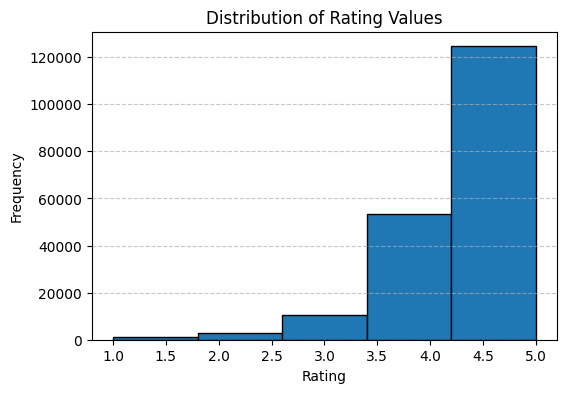

In [94]:
#distribution of rating values
plt.figure(figsize=(6, 4))
plt.hist(df_rent['new_rating'],bins =5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [133]:
df_rent.groupby('new_rating')['age'].median()

new_rating
1.0    34.0
2.0    33.0
3.0    33.0
4.0    32.0
5.0    32.0
Name: age, dtype: float64

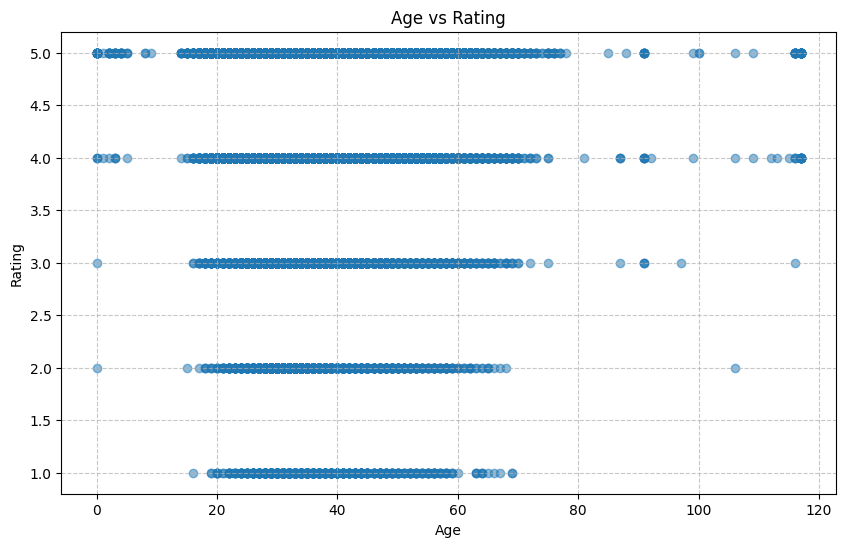

In [114]:
plt.figure(figsize=(10, 6))
average_size = df_rent.groupby('.median()
plt.scatter(df_rent['age'], df_rent['new_rating'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Correlation of Columns

C:\Users\lanar\AppData\Local\Temp\ipykernel_33284\4230928263.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['body type'] = selected_data['body type'].map(body_type_mapping)
C:\Users\lanar\AppData\Local\Temp\ipykernel_33284\4230928263.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['rented for'] = selected_data['rented for'].map(category_mapping)
C:\Users\lanar\AppData\Local\Temp\ipykernel_33284\4230928263.py:40: SettingWithCopyWarning: 
A value is trying to be set on a

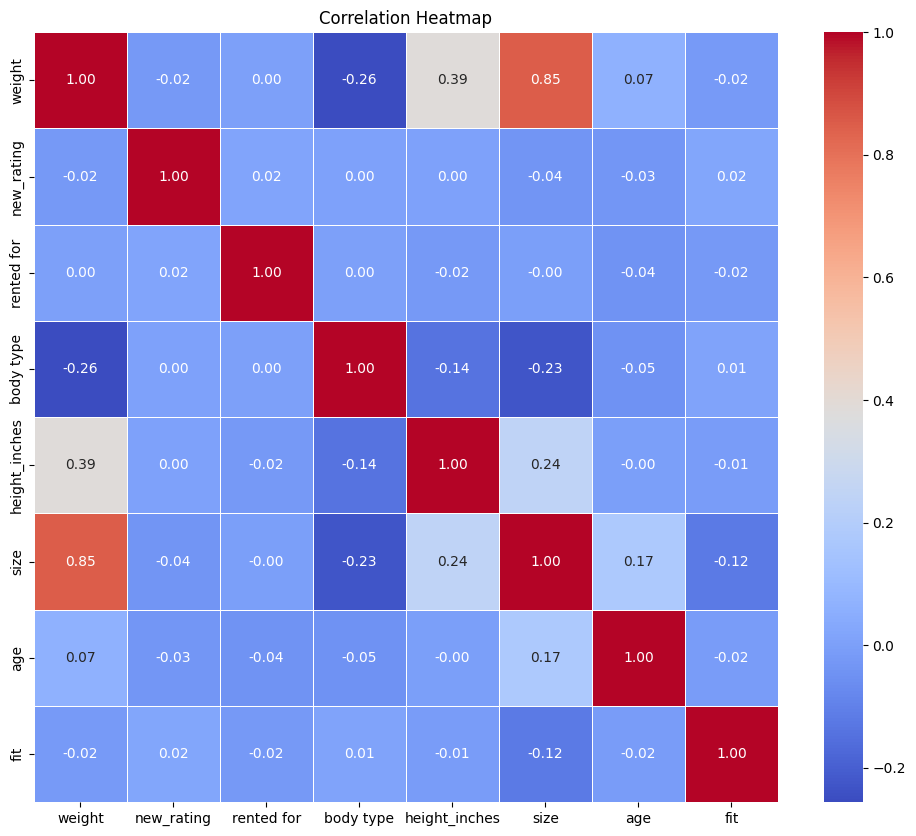

In [97]:
selected_columns = ['weight','new_rating', 'rented for','body type','height_inches','size', 'age','fit' ]

selected_data = df_rent[selected_columns]

category_mapping = {
    'date': 1,
    'everyday': 2,
    'formal affair': 3,
    'party': 4,
    'party: cocktail': 5,
    'vacation': 6,
    'wedding': 7,
    'work': 8,
    'other': 9,
    None: 0  # NaN or missing values
}

body_type_mapping = {
    'apple': 1,
    'athletic': 2,
    'full bust': 3,
    'hourglass': 4,
    'pear': 5,
    'petite': 6,
    'straight & narrow': 7,
    None: 0  # Handling NaN or missing values
}

fit_mapping = {

    'small': 1,
    'fit': 2,
    'large': 3,
    None: 0
}

# Map the values
selected_data['body type'] = selected_data['body type'].map(body_type_mapping)
selected_data['rented for'] = selected_data['rented for'].map(category_mapping)
selected_data['fit'] = selected_data['fit'].map(fit_mapping)


# dropping missing values if there are any in salary_range 
selected_data = selected_data.dropna()

# correlation matrix
correlation_matrix = selected_data.corr()

# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Data Imputation

In [15]:
df_rent.isnull().sum()

fit                   0
user_id               0
bust size         18411
item_id               0
weight            29982
rating               82
rented for           10
review_text           0
body type         14637
review_summary        0
category              0
height              677
size                  0
age                 960
review_date           0
dtype: int64

In [100]:
#imputating missing values

df_rent["bust size"] = df_rent["bust size"].fillna("Unknown")
df_rent["weight"] = df_rent["weight"].fillna(df_rent["weight"].median())
df_rent["rented for"] = df_rent["rented for"].fillna("other")
df_rent["body type"] = df_rent["body type"].fillna(df_rent["body type"].mode()[0])
df_rent["new_rating"] = df_rent["new_rating"].fillna(df_rent["new_rating"].mode()[0])
df_rent["age"] = df_rent["age"].fillna(df_rent["age"].median())
df_rent["height_inches"] = df_rent["height_inches"].fillna(df_rent["height_inches"].median())

In [101]:
df_rent.isnull().sum()

fit                0
user_id            0
bust size          0
item_id            0
weight             0
rating             0
rented for         0
review_text        0
body type          0
review_summary     0
category           0
height             0
size               0
age                0
review_date        0
height_inches      0
rew_rating        82
new_rating         0
dtype: int64